In [ ]:
import os
os.environ["KERAS_BACKEND"] = "torch"



In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from keras import layers, Model, Sequential

In [4]:
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=64, shuffle=False)

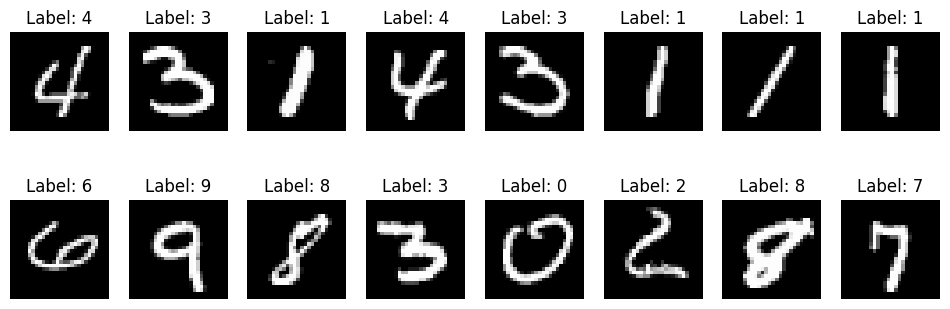

In [5]:
images_count = 0
for images, labels in train_loader:
    plt.figure(figsize=(12,4))
    for i in range(16):
        plt.subplot(2,8,i+1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.axis('off')
        plt.title(f'Label: {labels[i].item()}')
    plt.show()
    images_count += len(images)
    if images_count >= 10:
        break


Create the autoencoder class

In [6]:
class AutoEncoder(Model):
    def __init__(self):
        super().__init__()
        self.encoder = Sequential([
            layers.Dense(128, activation='relu', input_shape=(784,)),
            layers.Dense(64, activation='relu'),
            layers.Dense(32, activation='relu'),
            layers.Dense(32, activation='relu') #latent space
        ])

        self.decoder = Sequential([
            layers.Dense(32, activation='relu', input_shape=(32,)),
            layers.Dense(64, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(784, activation='sigmoid')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        latent = self.latent(encoded)
        decoded = self.decoder(latent)
        return decoded

In [8]:
model = AutoEncoder()
model.summary()

c:\Users\Hrishikesh\Desktop\da_assignment_3\venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "auto_encoder_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 32)             │       111,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (None, 784)            │       112,624 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,496 (876.94 KB)

 Trainable params: 224,496 (876.94 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [ ]:
epochs = 2000
outputs_list = []

patience = 7
patience_counter = 0

loss_list = []
accuracy_list = []

for epoch in range(epochs):
    epoch_loss = 0

    for images, _ in train_loader:
        images = images.view(-1, 28*28).to(device)

        optimizer.zero_grad()
        outputs = model(images, training=True)
        loss = loss_fn(outputs, images)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(train_loader)
    loss_list.append(epoch_loss)

    
    
